In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from train.dataset import DataSet
path = '/home/demo/anchormen/emotion-rec/data/fer2013/fer2013.csv'

Using TensorFlow backend.


In [3]:
df = pd.read_csv(path, delimiter=',')

In [4]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [5]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [6]:
df = df.replace({'emotion': {0: 1}}).replace({'emotion': {6: 0}})

In [7]:
df['emotion'].unique()

array([1, 2, 4, 0, 3, 5])

In [8]:
counts = df[df['Usage'] == 'Training'].groupby('emotion').count()

In [9]:
counts

,pixels,Usage
emotion,,
0,4965,4965
1,4431,4431
2,4097,4097
3,7215,7215
4,4830,4830
5,3171,3171


In [8]:
total = counts['Usage'].sum()

In [67]:
np.log(total / counts)['Usage']

emotion
0    1.972167
1    4.187324
2    1.946956
3    1.381048
4    1.782364
5    2.203164
6    1.754797
Name: Usage, dtype: float64

In [10]:
df_train = df[df['Usage'] == 'Training']
df_test = df[df['Usage'] == 'PrivateTest']

In [11]:
def to_labels_and_images(df):
    labels = df['emotion']
    images = []
    for _, row in df.iterrows():
        images.append(row['pixels'].split())
    return np.asarray(images, dtype='float32'), labels

In [12]:
train_x, train_y = to_labels_and_images(df_train)
test_x, test_y = to_labels_and_images(df_test)

In [6]:
print(train_x[0].max(), train_x[0].min())

210.0 11.0


In [17]:
train_x.max()

255.0

In [21]:
ds_train = DataSet(train_x, train_y, 7)
ds_test = DataSet(train_x, train_y, 7)

In [13]:
import pickle

pickle.dump((train_x, train_y, test_x, test_y), open('/home/demo/anchormen/emotion-rec/data/preprocessed.p', 'wb'))

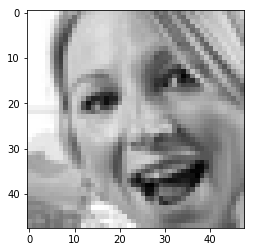

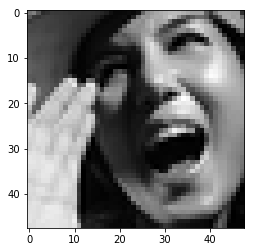

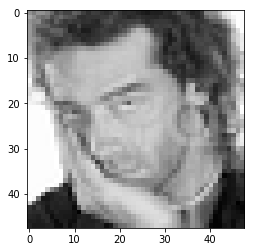

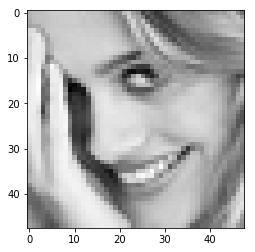

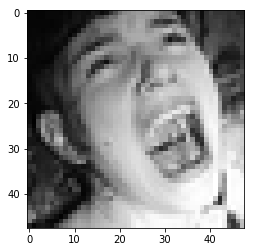

In [12]:
#plt.imshow(train_x[89].reshape((48, 48)), cmap='gray')

for i in np.random.randint(len(train_x), size=5):
    plt.imshow(train_x[i].reshape((48, 48)), cmap='gray')
    plt.show()